In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



# Importing MNIST Dataset

In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


##### limiting the size of training examples to train faster 

In [3]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [4]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

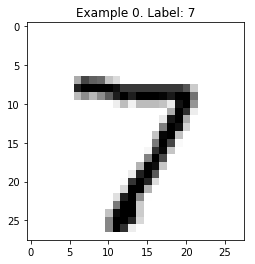

In [5]:
display(0)

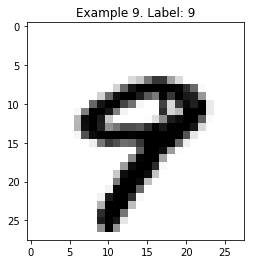

In [6]:
display(9)

In [8]:
print (len(data[0]))

784


# Linear Classifier

In [10]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x00000250DF3287B8>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

### Evaluating Accuracy

In [12]:
classifier.evaluate(test_data, test_labels)
print (classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


### Making predictions using our trained classifier

Predicted 7, Label: 7


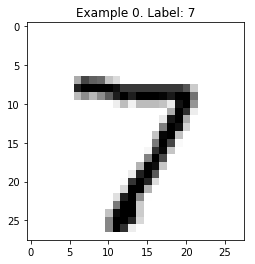

In [32]:
# here's one it gets right
prediction = classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[0]))
display(0)


Predicted 6, Label: 5


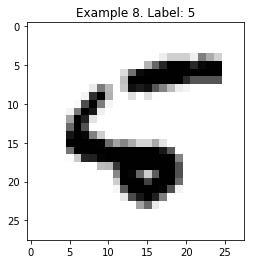

In [33]:
#here is one it gets wrong
prediction = classifier.predict(np.array([test_data[8]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[8]))
display(8)